In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive


[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive


In [ ]:
cd My Drive

[Errno 2] No such file or directory: 'My Drive'
/content/drive/My Drive


In [ ]:
import glob
import cv2
import numpy as np


In [ ]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack
from keras.models import model_from_json

# load models from file
def load_all_models():
  all_models = list()
  for i in range(3):
   # define filename for this ensembl
   filename = 'models/model'+str(i+1)+'.h5'
   # load json and create
   json_file = open('/content/drive/My Drive/models/model'+str(i+1)+'.json', 'r')
   loaded_model_json = json_file.read()
   json_file.close()
   model = model_from_json(loaded_model_json)
   # load weights into new model
   model.load_weights('/content/drive/My Drive/models/model'+str(i+1)+'.h5')
   # add to list of members
   all_models.append(model)
   print('>loaded %s' % filename)
  return all_models



In [ ]:
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	x=[]
	l=[]
	for model in members:
		# make prediction
		y_pred= model.predict(inputX, verbose=0)
		label = []
		for i in y_pred:
			if i>0.5:
				label.append(1)
			else :
				label.append(0)
		label=np.asarray(label)
		yhat=label.reshape(-1,1)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	st=np.asarray(stackX)
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	for i in range(len(stackX)):
		if(stackX[i][0]==0):
			stackX[i][1],stackX[i][2]=0,0
	for i in range(len(stackX)):
		if(stackX[i][1]==0):
			stackX[i][2]=0  
	for i in range(len(stackX)):
		x.append(stackX[i][0]*1+stackX[i][1]*10+stackX[i][2]*100) 
	for i in x:
		if i==0:
			l.append(0)
		elif i==1:
			l.append(1)
		elif i==11:
			l.append(2)
		else:
			l.append(3)
	l=np.asarray(l)
	l=l.reshape(-1,1)
	return l
	#return np.asarray(x),stackX,st



In [ ]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model



In [ ]:
# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat.reshape(-1,1)



In [ ]:
# generate 2d classification dataset
x_test=[]
y_test=[]

x_normal = np.load('/content/drive/My Drive/data/x_normal.npy')

x_viral = np.load('/content/drive/My Drive/data/x_viral.npy')

x_bacterial = np.load('/content/drive/My Drive/data/x_bacterial.npy')

x_covid=np.load('/content/drive/My Drive/data/x_covid.npy')
n=np.zeros(shape=(70,1))
v=np.zeros(shape=(70,1))
b=np.zeros(shape=(70,1))
c=np.zeros(shape=(70,1))

for i in range(70):
  b[i]=1
  v[i]=2
  c[i]=3


x_test=np.concatenate((x_normal[1300:1170],x_bacterial[1300:170],x_viral[1100:1170],x_covid[159:229]))
y_test=np.concatenate((n,b,v,c))

for i in range(len(x_test)):
    img = x_test[i]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR) 
    x_test[i]=img

print('Shape of train images: ', x_test[0].shape)
x_test=np.array(x_test)
print(x_test.shape)
				
# split into train and test

# load all models
members = load_all_models()
print('Loaded %d models' % len(members))
st=stacked_dataset(members,x_test)




Shape of train images:  (256, 256, 3)
(280, 256, 256, 3)
>loaded models/model1.h5
>loaded models/model2.h5
>loaded models/model3.h5
Loaded 3 models


In [ ]:
st


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [2],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
    

In [ ]:


# evaluate standalone models on test dataset
'''for model in members:
	testy_enc = to_categorical(testy)
	_, acc = model.evaluate(testX, testy_enc, verbose=0)
	print('Model Accuracy: %.3f' % acc)'''
# fit stacked model using the ensemble
y_test=y_test.reshape(-1,1)
model = fit_stacked_model(members, x_test, y_test)
# evaluate model on test set
acc = accuracy_score(st,y_test)
print('Stacked Test Accuracy: %.3f' % acc)

Stacked Test Accuracy: 0.743


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Normal : 
-----------------------------------
TP :  54
TN :  192
FP :  18
FN :  16
sensitivity :  0.7714285714285715
specificity :  0.9142857142857143
-----------------------------------
Bacteria : 
-----------------------------------
TP :  46
TN :  182
FP :  28
FN :  24
sensitivity :  0.6571428571428571
specificity :  0.8666666666666667
-----------------------------------
Viral : 
-----------------------------------
TP :  44
TN :  188
FP :  22
FN :  26
sensitivity :  0.6285714285714286
specificity :  0.8952380952380953
-----------------------------------
COVID-19 : 
-----------------------------------
TP :  64
TN :  168
FP :  22
FN :  26
sensitivity :  0.7111111111111111
specificity :  0.8842105263157894


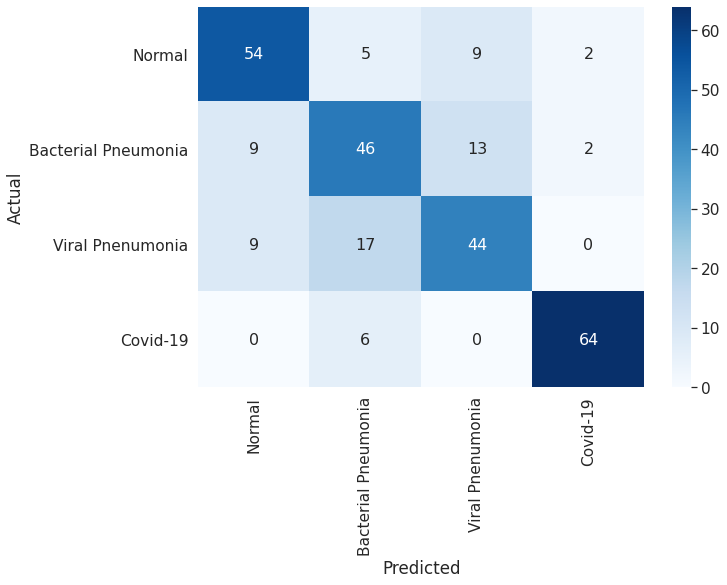

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,st)
import seaborn as sns
df_cm = pd.DataFrame(cm, columns=['Normal','Bacterial Pneumonia','Viral Pnenumonia','Covid-19'], index = ['Normal','Bacterial Pneumonia','Viral Pnenumonia','Covid-19'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='d')



def calc_metrics(cm):
  fp_nor=cm[1][0]+cm[2][0]+cm[3][0]
  fn_nor=cm[0][1]+cm[0][2]+cm[0][3]
  tp_nor=cm[0][0]
  tn_nor=np.sum(cm)-(tp_nor+fp_nor+fn_nor)
  fp_bac=cm[0][1]+cm[2][1]+cm[3][1]
  fn_bac=cm[1][0]+cm[1][2]+cm[1][3]
  tp_bac=cm[1][1]
  tn_bac=np.sum(cm)-(tp_bac+fp_bac+fn_bac)
  fp_vir=cm[0][2]+cm[1][2]+cm[3][2]
  fn_vir=cm[2][0]+cm[2][1]+cm[2][3]
  tp_vir=cm[2][2]
  tn_vir=np.sum(cm)-(tp_vir+fp_vir+fn_vir)
  fp_cov=cm[0][2]+cm[1][2]+cm[3][2]
  fn_cov=cm[2][0]+cm[2][1]+cm[2][3]
  tp_cov=cm[3][3]
  tn_cov=np.sum(cm)-(tp_cov+fp_cov+fn_cov)
  

  print("Normal : ")
  print("-----------------------------------")
  print("TP : ",tp_nor)
  print("TN : ",tn_nor)
  print("FP : ",fp_nor)
  print("FN : ",fn_nor)
  print("sensitivity : ",tp_nor/(float)((tp_nor+fn_nor)))
  print("specificity : ",tn_nor/(float)((tn_nor+fp_nor)))
  print("-----------------------------------")
  print("Bacteria : ")
  print("-----------------------------------")
  print("TP : ",tp_bac)
  print("TN : ",tn_bac)
  print("FP : ",fp_bac)
  print("FN : ",fn_bac)
  print("sensitivity : ",tp_bac/(float)((tp_bac+fn_bac)))
  print("specificity : ",tn_bac/(float)((tn_bac+fp_bac)))
  print("-----------------------------------")
  print("Viral : ")
  print("-----------------------------------")
  print("TP : ",tp_vir)
  print("TN : ",tn_vir)
  print("FP : ",fp_vir)
  print("FN : ",fn_vir)
  print("sensitivity : ",tp_vir/(float)((tp_vir+fn_vir)))
  print("specificity : ",tn_vir/(float)((tn_vir+fp_vir)))
  print("-----------------------------------")
  print("COVID-19 : ")
  print("-----------------------------------")
  print("TP : ",tp_cov)
  print("TN : ",tn_cov)
  print("FP : ",fp_cov)
  print("FN : ",fn_cov)
  print("sensitivity : ",tp_cov/(float)((tp_cov+fn_cov)))
  print("specificity : ",tn_cov/(float)((tn_cov+fp_cov)))
calc_metrics(cm)  


In [ ]:
n=np.zeros(shape=(20,1))
v=np.zeros(shape=(20,1))
b=np.zeros(shape=(20,1))
c=np.zeros(shape=(20,1))

for i in range(20):
  b[i]=1
  v[i]=2
  c[i]=3


x_test=np.concatenate((x_normal[900:920],x_bacterial[1000:1020],x_viral[1000:1020],x_covid[199:219]))
y_test=np.concatenate((n,b,v,c))

for i in range(len(x_test)):
    img = x_test[i]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR) 
    x_test[i]=img

t=stacked_dataset(members,x_test)


print('Shape of train images: ', x_test[0].shape)
x_test=np.array(x_test)
print(x_test.shape)
# evaluate standalone models on test dataset
'''for model in members:
	testy_enc = to_categorical(testy)
	_, acc = model.evaluate(testX, testy_enc, verbose=0)
	print('Model Accuracy: %.3f' % acc)'''
# fit stacked model using the ensemble
y_test=y_test.reshape(-1,1)
model = fit_stacked_model(members, x_test, y_test)
# evaluate model on test set
acc = accuracy_score(t,y_test)
print('Stacked Test Accuracy: %.3f' % acc)

Shape of train images:  (256, 256, 3)
(80, 256, 256, 3)
Stacked Test Accuracy: 0.750


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
